In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings 
warnings.filterwarnings('ignore')

In [7]:
print(tf.__version__)
print('GPU available: ', tf.test.is_gpu_available())

2.9.2
GPU available:  True


In [13]:
data = pd.read_csv('model_features.csv')
data = data.iloc[:,1:]
data.head()

,exp_years,perceived_age,Black/African American,Hispanic/Latino/a,Middle Eastern or South Asian,Native American,Pacific Islander,White,Female,Male,Transgender man/boy,Transgender woman/girl,year,weekday,hour,stop_dur
0,2.752745,0.962603,0,0,0,0,0,1,0,1,0,0,8,6,19,5
1,-0.743981,-0.156735,0,0,0,0,0,1,0,1,0,0,9,6,9,10
2,-0.743981,-0.156735,0,0,0,0,0,1,0,1,0,0,9,6,9,10
3,-0.604112,1.708828,1,0,0,0,0,0,0,1,0,0,9,6,8,40
4,-0.743981,-0.902959,0,0,0,0,0,1,1,0,0,0,9,6,9,10


In [17]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=75)

In [18]:
model = keras.Sequential([
    layers.Dense(units=32, activation='relu', input_dim=len(X.columns)),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1)
])

In [19]:
model.compile(loss='mean_squared_error', 
              optimizer=keras.optimizers.Adam(0.001))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=32)

Epoch 1/100
10021/10021 [==============================] - 32s 3ms/step - loss: 2501.5286 - val_loss: 2477.6775
Epoch 2/100
10021/10021 [==============================] - 34s 3ms/step - loss: 2487.0061 - val_loss: 2474.4827
Epoch 3/100
10021/10021 [==============================] - 33s 3ms/step - loss: 2482.4521 - val_loss: 2469.1963
Epoch 4/100
10021/10021 [==============================] - 30s 3ms/step - loss: 2478.0549 - val_loss: 2469.4873
Epoch 5/100
10021/10021 [==============================] - 34s 3ms/step - loss: 2475.7600 - val_loss: 2462.6387
Epoch 6/100
10021/10021 [==============================] - 33s 3ms/step - loss: 2473.4846 - val_loss: 2459.7473
Epoch 7/100
10021/10021 [==============================] - 30s 3ms/step - loss: 2472.4011 - val_loss: 2465.2253
Epoch 8/100
10021/10021 [==============================] - 30s 3ms/step - loss: 2471.4104 - val_loss: 2460.6572
Epoch 9/100
10021/10021 [==============================] - 30s 3ms/step - loss: 2470.0693 - val_loss: 24

In [22]:
model.save('nn_model')

In [25]:
y_pred = model.predict(X_test).flatten()

4986/4986 [==============================] - 7s 1ms/step


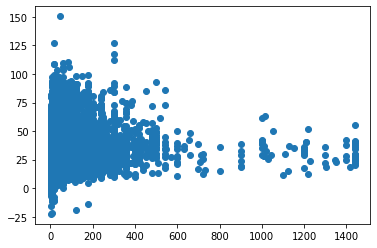

In [30]:
plt.scatter(y_test, y_pred.flatten())

In [1]:
error = y_pred - y_test
plt.hist(error)

NameError: ignored

In [24]:
model.evaluate(X_test, y_test, verbose=0)

2441.611572265625